## CSV Results Processor

Graph results of climate prediction data captured via CSV data.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
debug = False

DRIVE_PATH = "/content/drive/MyDrive/data606"

# Set the location of this script in GDrive
SCRIPT_PATH = DRIVE_PATH + "/src/"

# Root Path of the data on the cloud drive
DATA_ROOT = DRIVE_PATH + "/data/preds/"

# Journal file
JOURNAL_LOG = SCRIPT_PATH + "cv-results.csv"

# Colors for rendering
colors = 'rbygm'

In [3]:
# Visualization params
METRIC = 'MSE'

GROUP_COLS = ['TargetLabel','WindowSize','TestPct','Columns']
TGT_LABEL = 0
WIND_SIZE = 1
TEST_PCT = 2
COLS = 3

In [4]:
import glob
import os
import pandas as pd
from pathlib import Path
import numpy as np

df = pd.read_csv(JOURNAL_LOG)


In [5]:
df

DateTime  Serial   Model     TargetLabel  NumFeatures  WindowSize  \
0   20231113-0309  929958  LSTMv2  landSeaAvgTemp            6          60   
1   20231113-0312  737653  LSTMv2  landSeaAvgTemp            6          60   
2   20231113-0316  644646  LSTMv2  landSeaAvgTemp            6          60   
3   20231113-0317   45027  LSTMv2  landSeaAvgTemp            6          60   
4   20231113-0318  342047  LSTMv2  landSeaAvgTemp            8          60   
..            ...     ...     ...             ...          ...         ...   
56  20231114-1556  747585  LSTMv2  landSeaAvgTemp            4          30   
57  20231114-2248  459526  LSTMv2  landSeaAvgTemp            4          30   
58  20231114-2256  999341  LSTMv2  landSeaAvgTemp           11          30   
59  20231114-2349  112516  LSTMv2  landSeaAvgTemp           14          30   
60  20231114-2353  783769  LSTMv2  landSeaAvgTemp            7          30   

    TestPct  NumEpochs       MSE       MAE      MAPE    SKMAPE  \
0       0.2        124  0.059719  0.209622  0.012883  0.012883   
1       0.2        190  0.027584  0.146563  0.009131  0.009131   
2       0.2        120  0.038186  0.177644  0.011059  0.011059   
3       0.2        158  0.042659  0.175879  0.011174  0.011174   
4       0.2         93  0.079414  0.267332  0.016795  0.016795   
..      ...        ...       ...       ...       ...       ...   
56      0.2         30  5.859181  2.158759  0.136389  0.136389   
57      0.2         30  0.085579  0.263167  0.016520  0.016520   
58      0.2         30  0.140804  0.344492  0.021365  0.021365   
59      0.2         30  0.152370  0.321560  0.019506  0.019506   
60      0.2         86  0.020657  0.113167  0.007250  0.007250   

                                              Columns  
0   ['day', 'year', 'month', 'landSeaAvgTemp', 'co...  
1   ['day', 'year', 'month', 'landSeaAvgTemp', 'co...  
2   ['day', 'year', 'month', 'landSeaAvgTemp', 'co...  
3   ['day', 'year', 'month', 'landSeaAvgTemp', 'co...  
4   ['day', 'year', 'month', 'landSeaAvgTemp', 'co...  
..                                                ...  
56         ['day', 'year', 'month', 'landSeaAvgTemp']  
57         ['day', 'year', 'month', 'landSeaAvgTemp']  
58  ['day', 'year', 'month', 'landSeaAvgTemp', 'co...  
59  ['day', 'year', 'month', 'landSeaAvgTemp', 'co...  
60  ['day', 'year', 'month', 'landSeaAvgTemp', 'co...  

[61 rows x 13 columns]

In [6]:
df_net = df.groupby(GROUP_COLS)[METRIC].all()

In [7]:
df_net

TargetLabel     WindowSize  TestPct  Columns                                                                                                                                                                
landSeaAvgTemp  30          0.2      ['day', 'year', 'month', 'landSeaAvgTemp', 'co2', 'co2_seas', 'ice_extent', 'ice_missing', 'air_x', 'air_y', 'uwnd', 'volcanic_idx', 'pct_forest_cover', 'sunspot_num']    True
                                     ['day', 'year', 'month', 'landSeaAvgTemp', 'co2', 'co2_seas', 'ice_extent', 'ice_missing', 'policy_rate']                                                                  True
                                     ['day', 'year', 'month', 'landSeaAvgTemp', 'co2', 'co2_seas', 'ice_extent', 'ice_missing', 'volcanic_idx', 'pct_forest_cover', 'sunspot_num']                              True
                                     ['day', 'year', 'month', 'landSeaAvgTemp', 'co2', 'co2_seas', 'ice_extent', 'ice_missing']                             

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Delete rows w/o a real serial
df = df[df['Serial'] > 10]

Text(0.5, 1.0, 'MSE for all Serials')

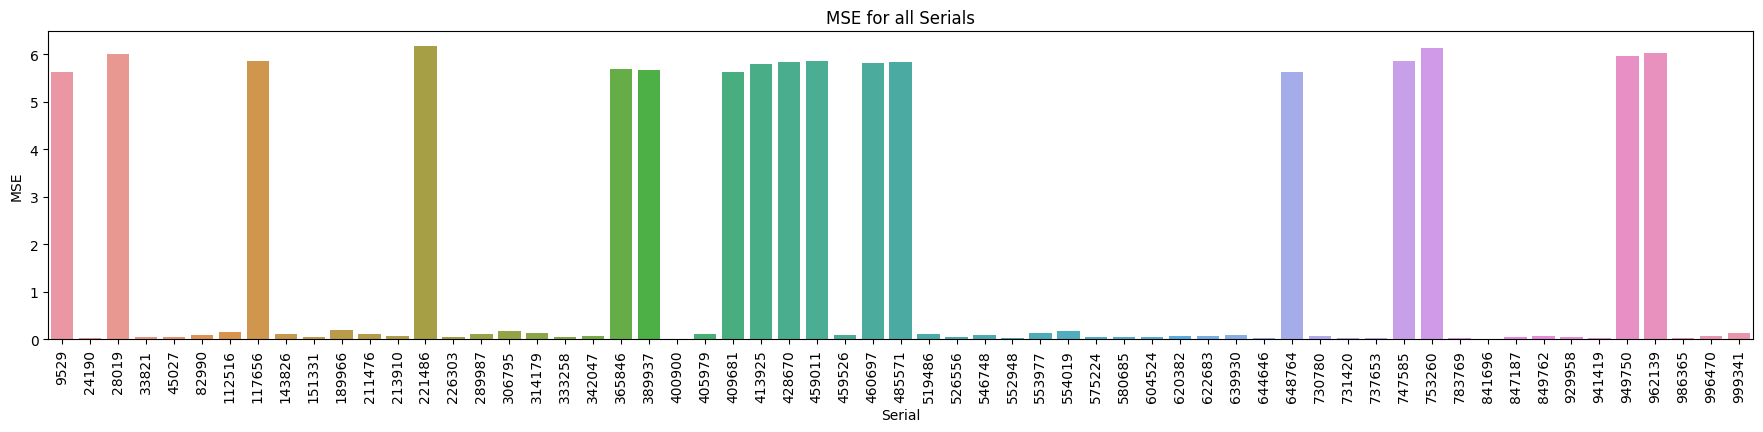

In [10]:
plt.rcParams["figure.figsize"] = [22,4]
sns.barplot(x=df['Serial'], y=df[METRIC])
#plt.plot(df[COLS])
plt.xlabel('Serial')
plt.xticks(rotation=90)
plt.ylabel(METRIC)
plt.title(f'{METRIC} for all Serials')

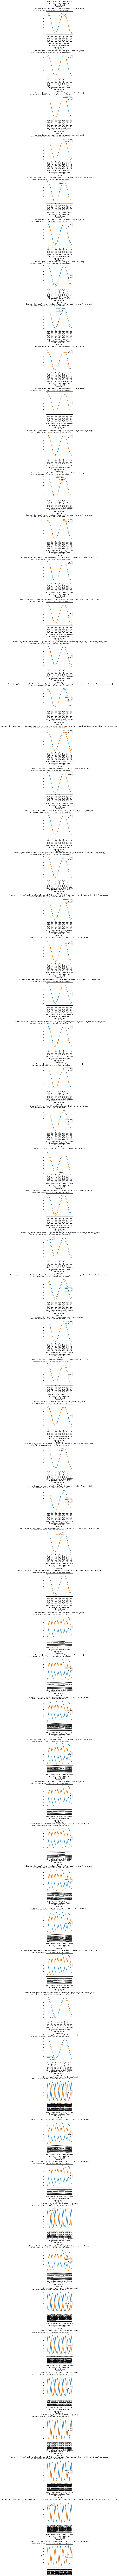

In [11]:
plt.rcParams["figure.figsize"] = [8,6]
num_graphs = df.shape[0]
fig, axs = plt.subplots(num_graphs, 1, figsize=(5,(num_graphs*5)), layout="constrained")

for i,s in enumerate(df.index):
  cur_row = df.loc[s]
  serial = cur_row['Serial']
  if (serial <= 10):
    continue
  this_ax = axs[i]
  mse = cur_row['MSE']
  mae = cur_row['MAE']
  epochs = cur_row['NumEpochs']
  #print(serial)
  df_stats = pd.read_csv(DATA_ROOT + f'model-preds-{serial}.csv')
  index=df_stats.index.values
  df_stats.drop(columns=['index'],inplace=True)
  #df_stats.drop(columns=['Unnamed: 0'], inplace=True)
  sns.lineplot(data=df_stats, ax=this_ax)
  #this_ax.xticks(rotation=90)
  this_ax.set_xticks(index, labels=df_stats.pred_dates.values, rotation=90)
  plt.ylabel(METRIC)
  title_str = [f'{GROUP_COLS[t]}: {cur_row[GROUP_COLS[t]]}\n' for t in range(4)]
  title_str = ''.join(title_str)
  this_ax.set_title(f'({i}) Pred vs. Actual for Serial {serial}\n{title_str}')
  this_ax.annotate(f'MSE: {mse}   MAE: {mae} Epochs: {epochs}',
              xy=(1,1),  # point to annotate - see xycoords for units
              xytext=(-20, 10),  # offset from xy - units in textcoords
              xycoords='axes fraction',  # how coords are translated?
              textcoords='offset pixels', # 'axes fraction', 'offset pixels'
              horizontalalignment='right'
              )
  plt.legend(df_stats.columns)
